#### Analysis of Banking Stocks


In this notebook we examine how bank stocks performed during two periods: the financial crisis of 2008 and the Covid recession period. 

In [3]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

/tmp/ipykernel_30247/1883746537.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We will analyse some of the major financial institutions in the United States as listed below. 


*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [4]:
import yfinance as yf

In [5]:
start_date = '2007-01-01'
end_date = '2020-12-31'

In [7]:

BAC = yf.download("BAC", start=start_date, end=end_date)
BAC.head(5)

/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,53.400002,54.180000,52.990002,53.330002,37.752415,16028200
2007-01-04,53.330002,53.889999,53.049999,53.669998,37.993111,13175000
2007-01-05,53.590000,53.590000,53.029999,53.240002,37.688694,10205000
2007-01-08,53.459999,53.639999,52.799999,53.450001,37.837372,9685900
2007-01-09,53.599998,53.709999,52.970001,53.500000,37.872768,12546500


In [11]:
# CitiGroup
C = yf.download("C", start=start_date, end=end_date)

# Goldman Sachs
GS = yf.download("GS", start=start_date, end=end_date)

# JPMorgan Chase
JPM = yf.download("JPM", start=start_date, end=end_date)

# Morgan Stanley
MS = yf.download("MS", start=start_date, end=end_date)

# Wells Fargo
WFC = yf.download("WFC", start=start_date, end=end_date)

/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h'


/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [12]:
df = yf.download(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start=start_date, end=end_date)

/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/codespace/.python/current/lib/python3.10/site-packages/yfinance/utils.py:775: Fu

Creating a list of the ticker symbols (as strings) in alphabetical order. 

In [13]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [14]:
dfs = [BAC, C, GS, JPM, MS, WFC]
bank_stocks = pd.concat(dfs,axis=1,keys=tickers)

In [15]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2007-01-03  53.400002  54.180000  52.990002  53.330002  37.752415  16028200   
2007-01-04  53.330002  53.889999  53.049999  53.669998  37.993111  13175000   
2007-01-05  53.590000  53.590000  53.029999  53.240002  37.688694  10205000   
2007-01-08  53.459999  53.639999  52.799999  53.450001  37.837372   9685900   
2007-01-09  53.599998  53.709999  52.970001  53.500000  37.872768  12546500   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2007-01-03  556.599976  562.799988  547.200012  552.500000  ...  80.820000   
2007-01-04  552.500000  561.500000  547.200012  550.599976  ...  80.500000   
2007-01-05  550.000000  550.500000  544.599976  547.700012  ...  80.360001   
2007-01-08  546.000000  551.500000  543.000000  550.500000  ...  80.040001   
2007-01-09  550.099976  551.500000  541.900024  545.700012  ...  80.720001   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2007-01-03  81.620003  47.335918  4816100  35.930000  36.009998  35.369999   
2007-01-04  81.910004  47.504093  5036400  35.740002  36.020000  35.540001   
2007-01-05  80.860001  46.895145  4674300  35.790001  35.830002  35.509998   
2007-01-08  81.349998  47.179329  4852800  35.610001  35.889999  35.389999   
2007-01-09  81.160004  47.069134  5039500  35.580002  35.849998  35.480000   

                                            
                Close  Adj Close    Volume  
Date                                        
2007-01-03  35.740002  22.240786  12447600  
2007-01-04  35.799999  22.278124  11060500  
2007-01-05  35.599998  22.153658  10329200  
2007-01-08  35.500000  22.091431  11650400  
2007-01-09  35.590000  22.147436  10159800  

[5 rows x 36 columns]

In [16]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [17]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2007-01-03   53.400002  54.180000  52.990002  53.330002  37.752415  16028200   
2007-01-04   53.330002  53.889999  53.049999  53.669998  37.993111  13175000   
2007-01-05   53.590000  53.590000  53.029999  53.240002  37.688694  10205000   
2007-01-08   53.459999  53.639999  52.799999  53.450001  37.837372   9685900   
2007-01-09   53.599998  53.709999  52.970001  53.500000  37.872768  12546500   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2007-01-03   556.599976  562.799988  547.200012  552.500000  ...  80.820000   
2007-01-04   552.500000  561.500000  547.200012  550.599976  ...  80.500000   
2007-01-05   550.000000  550.500000  544.599976  547.700012  ...  80.360001   
2007-01-08   546.000000  551.500000  543.000000  550.500000  ...  80.040001   
2007-01-09   550.099976  551.500000  541.900024  545.700012  ...  80.720001   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2007-01-03   81.620003  47.335918  4816100  35.930000  36.009998  35.369999   
2007-01-04   81.910004  47.504093  5036400  35.740002  36.020000  35.540001   
2007-01-05   80.860001  46.895145  4674300  35.790001  35.830002  35.509998   
2007-01-08   81.349998  47.179329  4852800  35.610001  35.889999  35.389999   
2007-01-09   81.160004  47.069134  5039500  35.580002  35.849998  35.480000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2007-01-03   35.740002  22.240786  12447600  
2007-01-04   35.799999  22.278124  11060500  
2007-01-05   35.599998  22.153658  10329200  
2007-01-08   35.500000  22.091431  11650400  
2007-01-09   35.590000  22.147436  10159800  

[5 rows x 36 columns]

We attempt to ascertain the max closing price of each bank stock. 

In [18]:
for i in tickers:
    print(i,":",bank_stocks[i]['Close'].max())

BAC : 54.04999923706055
C : 552.5
GS : 273.3800048828125
JPM : 141.08999633789062
MS : 89.30000305175781
WFC : 65.93000030517578


In [19]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.049999
C      552.500000
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

##### Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [20]:
returns = pd.DataFrame()

In [21]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.006375,-0.003439,-0.009316,0.002496,0.003553,0.001679
2007-01-05,-0.008012,-0.005267,0.001006,-0.008300,-0.012819,-0.005587
2007-01-08,0.003944,0.005112,0.023512,0.003348,0.006060,-0.002809
2007-01-09,0.000935,-0.008719,0.001718,-0.004171,-0.002336,0.002535


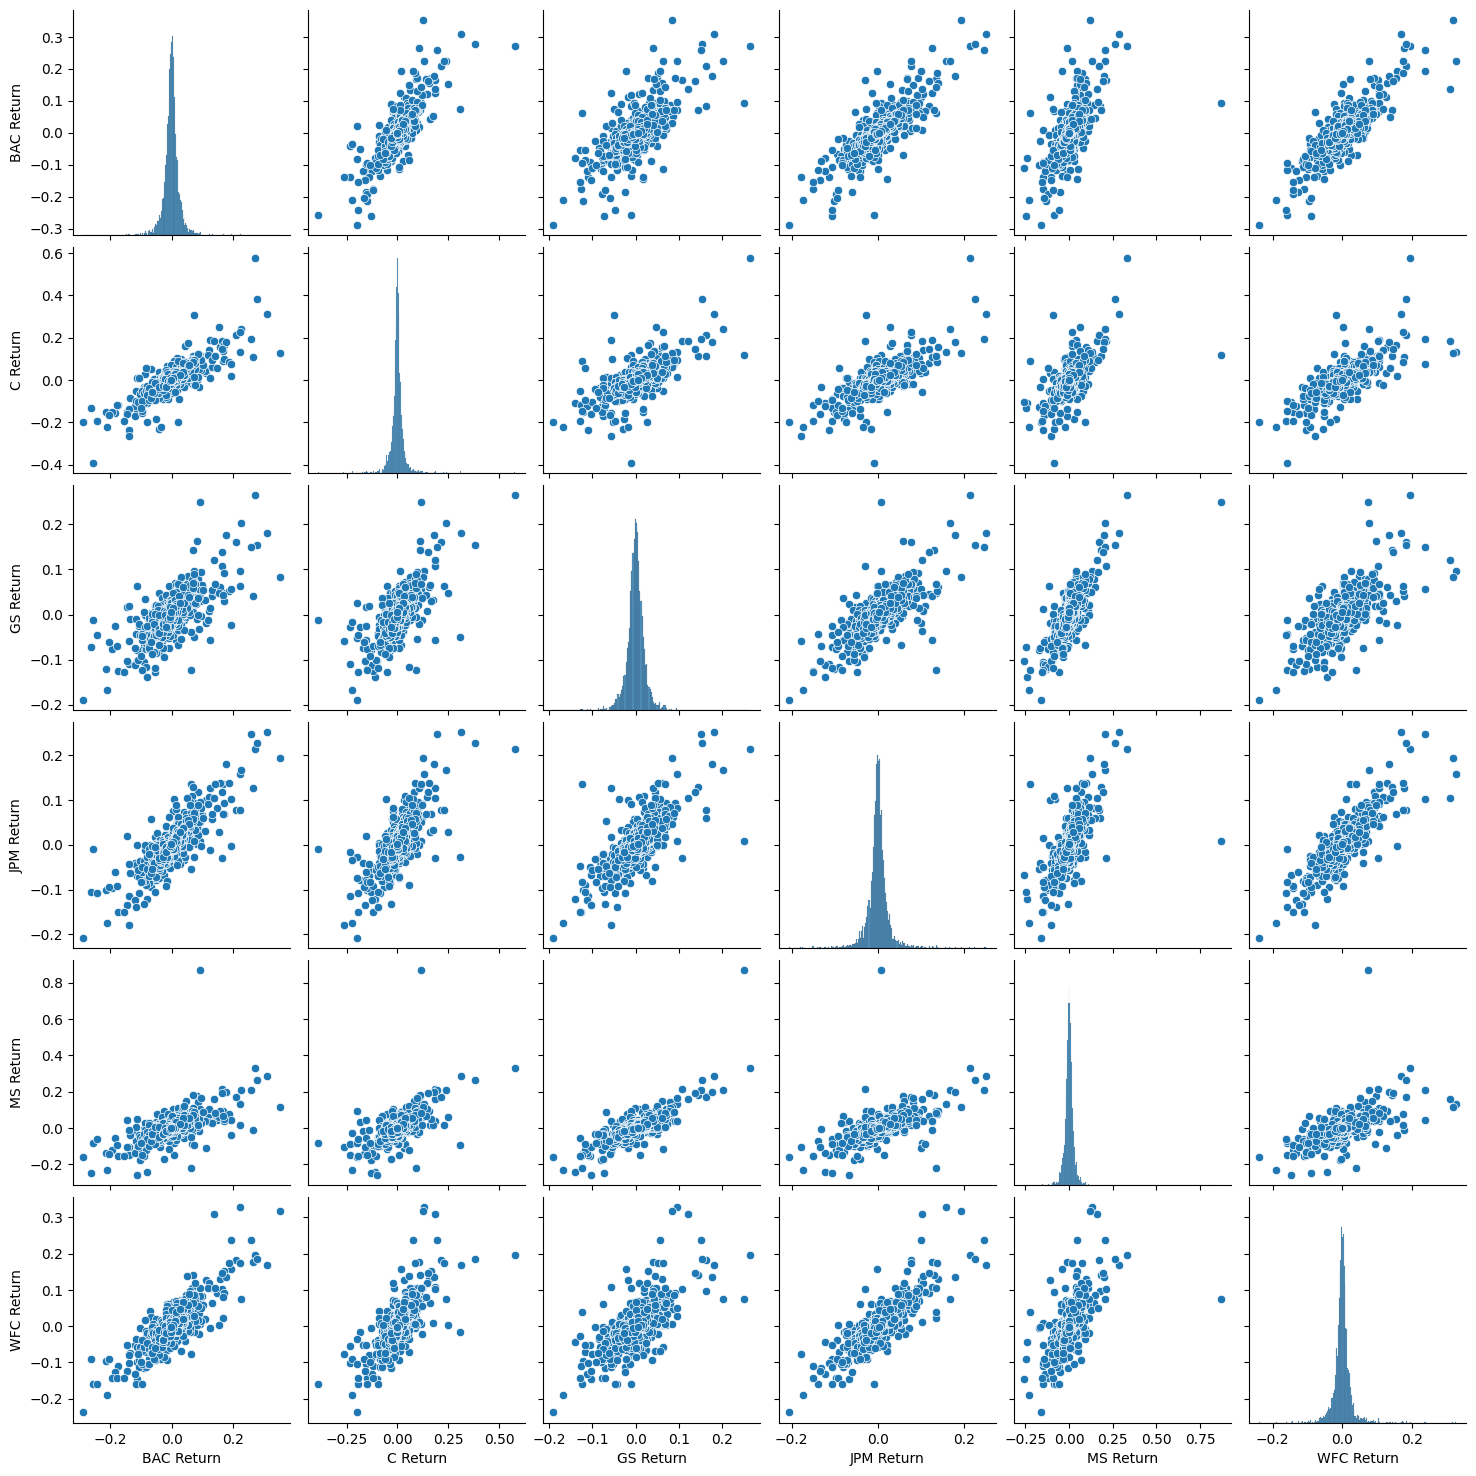

In [22]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

### Using the returns DataFrame, figuring out on the dates each bank stock had the best and worst single day returns.

In [23]:

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### We notice that Citigroup's largest drop and biggest gain were very close to one another

In [24]:
# Best Single Day Gain
# Citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

[Citigroup had a stock split.](https://www.google.com/search?q=citigroup+stock+2011+May&rlz=1C1YTUH_enIN1058IN1058&oq=citigroup+stock+2011+May&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigAdIBCDY2OTFqMWo0qAIAsAIA&sourceid=chrome&ie=UTF-8)

In [19]:
returns.std() # Citigroup riskiest

BAC Return    0.028969
C Return      0.031109
GS Return     0.022144
JPM Return    0.024016
MS Return     0.030587
WFC Return    0.024800
dtype: float64

### Returns During the peroid of COVID-19 Lockdown

In [20]:
returns.loc['2020-05-01':'2021-12-31'].std() # Very similar risk profiles, Wells Fargo the highest and JP Morgan the lowest

BAC Return    0.021319
C Return      0.023632
GS Return     0.019379
JPM Return    0.018584
MS Return     0.020093
WFC Return    0.025610
dtype: float64

### Creating a distplot using seaborn of the 2021 returns for Wells Fargo

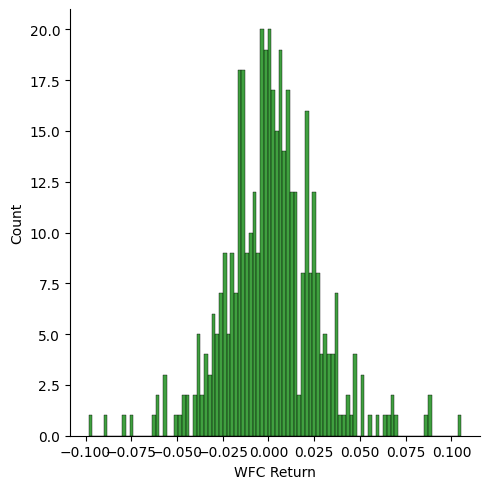

In [21]:
sns.displot(returns.loc['2020-05-01':'2021-12-31']['WFC Return'],color='green',bins=100)

### Creating a distplot using seaborn of the 2008 returns for CitiGroup

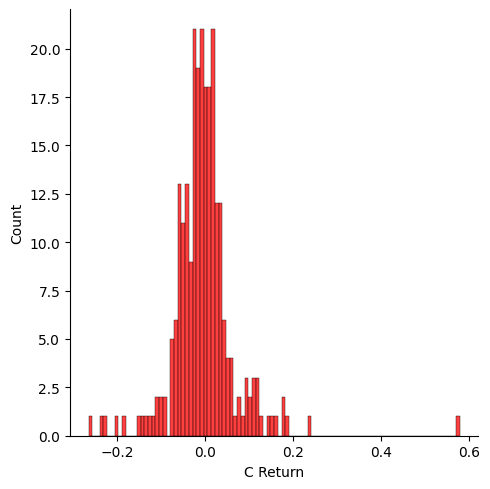

In [22]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


## More Visualizations


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

### Create a line plot showing Close price for each bank for the entire index of time.

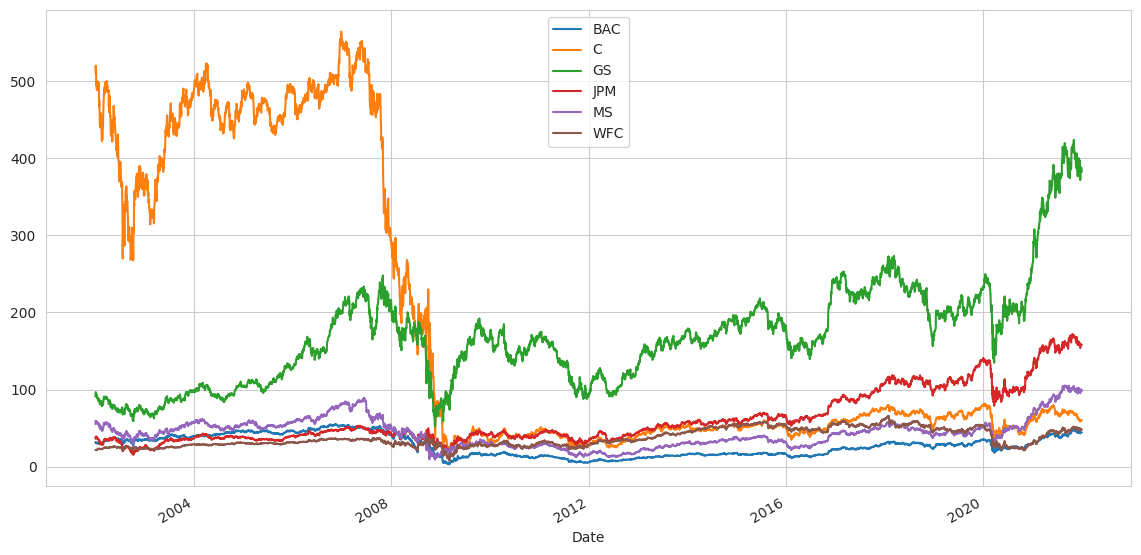

In [25]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(14,7),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

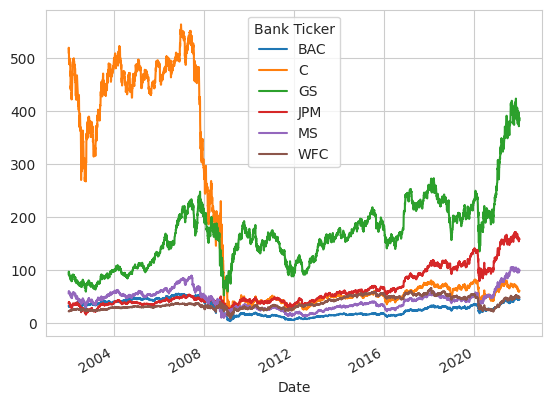

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [27]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

/home/codespace/.python/current/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



## Moving Averages

Analyzing the moving averages for these stocks in the year 2021. 

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2021

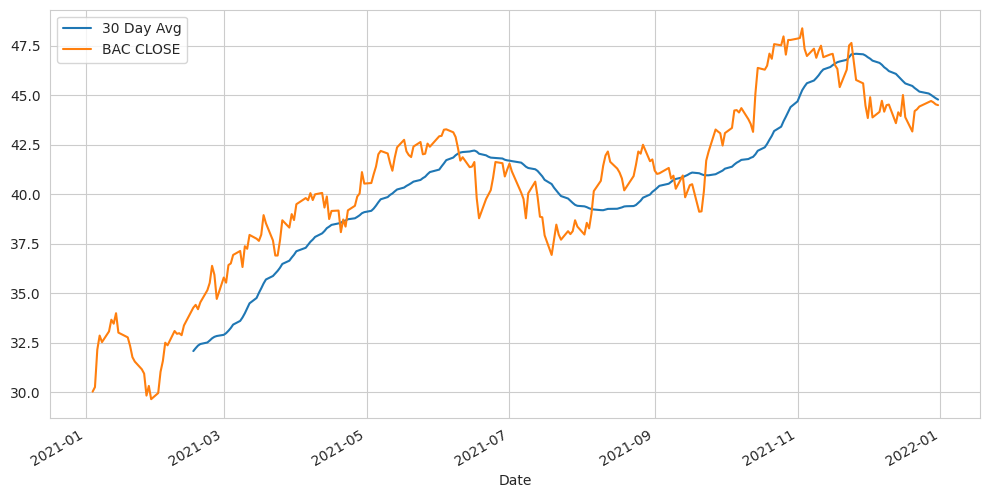

In [28]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2021-01-01':'2022-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2021-01-01':'2022-01-01'].plot(label='BAC CLOSE')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

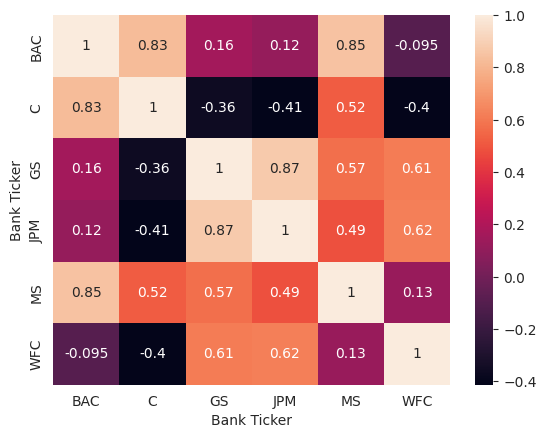

In [29]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

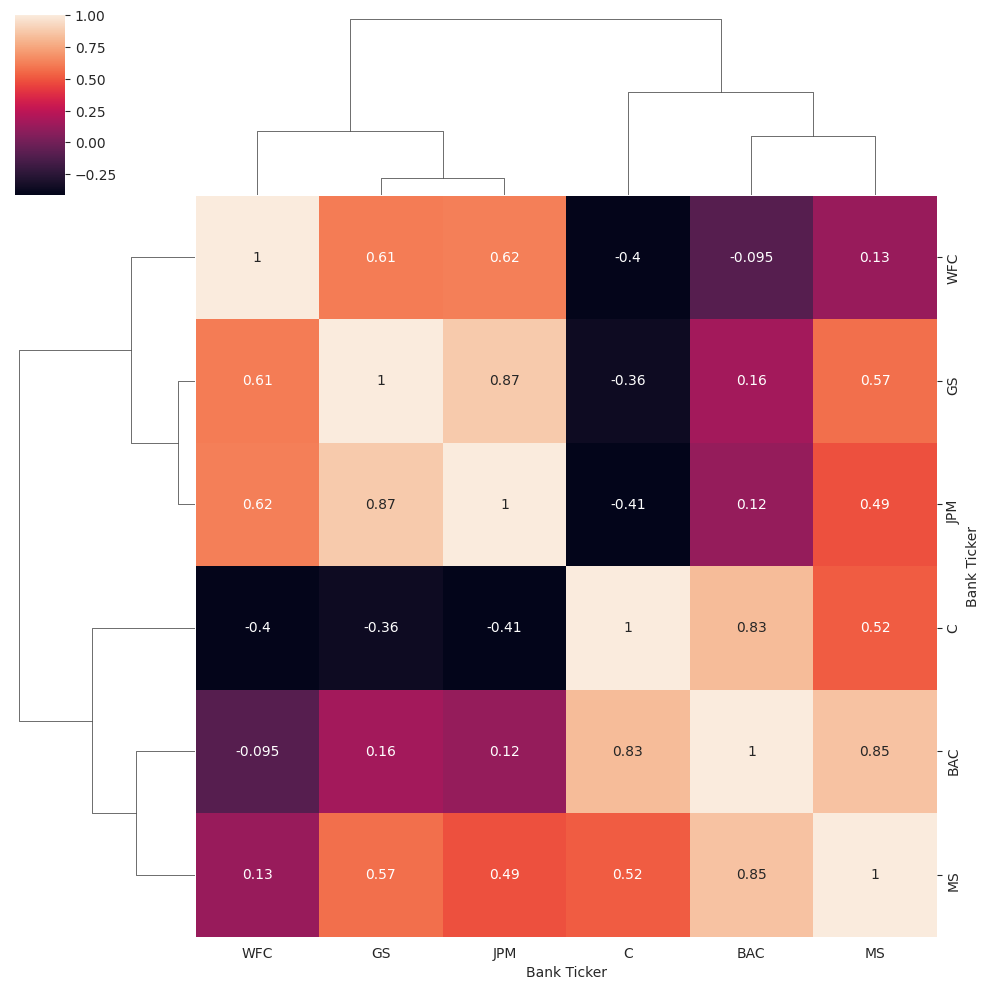

In [30]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [31]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

### Candle plot of Morgan Stanley's stock from Jan 1st 2020 to Jan 1st 2021

In [32]:
MS[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

### Moving Averages plot of Morgan Stanley for the year 2020

In [33]:
MS['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

/home/codespace/.python/current/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/home/codespace/.python/current/lib/python3.10/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



### Bollinger Band Plot for Bank of America for the year 2021.**

In [47]:
BAC['Close'].loc['2021-01-01':'2022-01-01'].ta_plot(study='boll')